#Laboratorio Práctico: Procesamiento de Imágenes
**Tiempo estimado:** 50 minutos

**Objetivos:** Al finalizar este laboratorio, vas a poder aplicar conceptos fundamentales de manipulación, análisis y segmentación de imágenes utilizando las librerías `OpenCV` y `scikit-image`     

In [ ]:
# Importación de las librerías necesarias para el laboratorio
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt
import skimage as ski
from skimage import filters, feature, exposure, io
from PIL import Image
from google.colab import files

##Parte 0: Preparación del Entorno (5 minutos)

Primero, vamos a descargar las imágenes que vamos a usar en los ejercicios. Con estos comandos, las guardamos en el entorno de ejecución del notebook.

- `texto.png:` Una imagen con texto, ideal para el análisis de bordes.

- `paisaje.jpg:` Una imagen a color para la manipulación de canales.

- `monedas.jpg:` Una imagen de monedas sobre un fondo, perfecta para segmentación.

In [ ]:
# Descarga de las imágenes de trabajo
!wget -q https://lh3.googleusercontent.com/proxy/0Lf8l5VqGTH-Xv7EWfMiY-l4EVxRzuYYtAN9GI_eXCuioGp0K2BsrXo38WAMRjJR3aNB-602vjmichZ9dpN7rcoiNtpRSyIIakM -O texto.png
!wget -q https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/124084.jpg -O paisaje.jpg
!wget -q https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg -O monedas.jpg

print("Imágenes descargadas correctamente.")

Imágenes descargadas correctamente.


In [ ]:
# Función auxiliar que vamos a usar durante todo el laboratorio
def mostrar_imagenes(imagenes, titulos, cmap='gray', figsize=(12, 4)):
    """
    Función auxiliar para visualizar una o más imágenes en una misma fila.
    Parámetros:
    - imagenes: lista de imágenes (arrays de NumPy o similares).
    - titulos: lista de títulos correspondientes a cada imagen.
    - cmap: mapa de color a usar (por defecto 'gray' para imágenes en escala de grises).
    - figsize: tamaño de la figura en pulgadas (ancho, alto).
    """
    # Contamos cuántas imágenes vamos a mostrar
    n = len(imagenes)

    # Creamos un objeto 'fig' y un array de ejes 'axes' con 1 fila y n columnas
    fig, axes = plt.subplots(1, n, figsize=figsize)

    # Si solo hay una imagen, 'axes' no es iterable, así que lo convertimos en lista
    if n == 1:
        axes = [axes]

    # Iteramos sobre cada eje, imagen y título simultáneamente
    for ax, img, titulo in zip(axes, imagenes, titulos):
        # Mostramos la imagen en el eje correspondiente
        # Usamos el cmap solo si la imagen es 2D (escala de grises)
        ax.imshow(img, cmap=cmap if len(img.shape) == 2 else None)

        # Le asignamos un título al eje
        ax.set_title(titulo)

        # Ocultamos los ejes para que no aparezcan los ticks ni las marcas
        ax.axis('off')

    # Ajustamos los espacios para que no se solapen títulos ni imágenes
    plt.tight_layout()

    # Mostramos la figura final en pantalla
    plt.show()


###Ejercicio 1: Análisis y Manipulación Básica (10 minutos)

Empezamos con lo fundamental: cargar una imagen y entender su estructura.

Tareas:

- Cargá la imagen `paisaje.jpg` usando OpenCV.

- Implementá una función que analice y muestre sus propiedades principales.

- Extraé y visualizá cada canal de color (Azul, Verde, Rojo) por separado.

- Convertí la imagen del formato BGR (propio de OpenCV) a RGB y comparala con la original.

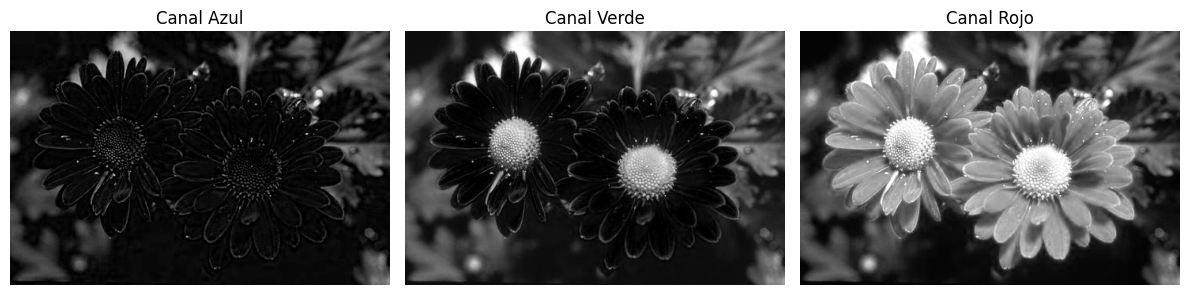

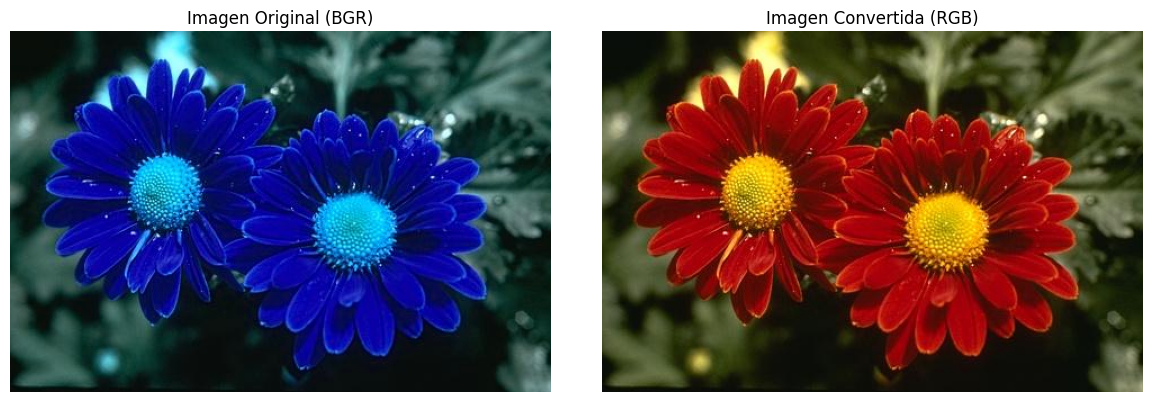

In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 1
# --------------------------------------

# 1.1: Cargá la imagen 'paisaje.jpg'
img_paisaje = cv2.imread('paisaje.jpg')  # OpenCV carga en formato BGR

# 1.2: Implementá esta función
def analizar_imagen(img):
    print("Dimensiones (alto x ancho x canales):", img.shape)
    print("Tipo de datos de los píxeles:", img.dtype)
    print("Valor mínimo de intensidad:", np.min(img))
    print("Valor máximo de intensidad:", np.max(img))
    print("Cantidad total de píxeles:", img.size)
    pass
    """
    Debe imprimir en consola:
    - Dimensiones (alto x ancho x canales)
    - Tipo de datos de los píxeles (ej: uint8)
    - Valores de intensidad mínimo y máximo
    - Cantidad total de píxeles
    """
# 1.3: Extraé cada canal de color
# Recordá que OpenCV carga las imágenes en formato BGR

canal_b = img_paisaje[:, :, 0]  # Canal azul
canal_g = img_paisaje[:, :, 1]  # Canal verde
canal_r = img_paisaje[:, :, 2]  # Canal rojo

# 1.4: Convertí la imagen de BGR a RGB
img_rgb = cv2.cvtColor(img_paisaje, cv2.COLOR_BGR2RGB)

# Visualización de los canales individuales
mostrar_imagenes([canal_b, canal_g, canal_r],
                 ['Canal Azul', 'Canal Verde', 'Canal Rojo'])

# Comparación entre imagen original BGR y la convertida a RGB
mostrar_imagenes([img_paisaje, img_rgb],
                 ['Imagen Original (BGR)', 'Imagen Convertida (RGB)'])

1. **Canal Azul (Canal Azul)** : Muestra solo la intensidad del color azul. Las flores se ven brillantes, lo que indica que tienen mucho azul.

2. **Canal Verde (Canal Verde)**: Aquí se visualiza cuánto verde hay. Las flores son menos brillantes, así que tienen menos verde.

3. **Canal Rojo (Canal Rojo)**: Muestra la intensidad del rojo. Las flores vuelven a verse brillantes, lo que indica que también tienen bastante rojo.

4. **Imagen Original (BGR)**: Es la imagen en su formato original, donde los colores están ordenados como Azul, Verde, Rojo. Las flores parecen azules con centros amarillos.

5. **Imagen Convertida (RGB)**: Es la misma imagen, pero con los colores reordenados como Rojo, Verde, Azul. Las flores ahora parecen rojas con centros amarillos.

🔄 **¿Por qué cambia tanto?**
Porque al cambiar el orden de los canales (de BGR a RGB), lo que antes era azul se interpreta como rojo, y viceversa.

**OpenCV usa BGR por convención interna histórica, matplotlib usa RGB por convención estándar en gráficos. Siempre hay que convertir antes de mostrar si querés colores correctos.**

In [ ]:
# --- Pregunta Conceptual ---
print("Pregunta Conceptual 1:")
print("¿Por qué la imagen se ve con colores extraños cuando se muestra")
print("directamente con matplotlib después de cargarla con OpenCV?")

*Porque OpenCV carga las imágenes en BGR (Azul-Verde-Rojo) y matplotlib espera RGB (Rojo-Verde-Azul). Al mostrarlas sin convertir, los canales se mezclan y los colores se ven raros.*

### Ejercicio 2: Transformaciones Geométricas (10 minutos)

Ahora vamos a manipular la geometría de la imagen.

Tareas:

- Recortá una "región de interés" (ROI) de 100x100 píxeles de la imagen del paisaje.

- Redimensioná ese recorte para que mida 200x200 píxeles.

- Creá un mosaico de 2x2 utilizando el recorte redimensionado.

- (Opcional) Aplicá una rotación de 45 grados al recorte original.

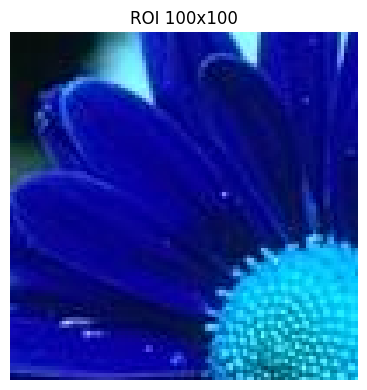

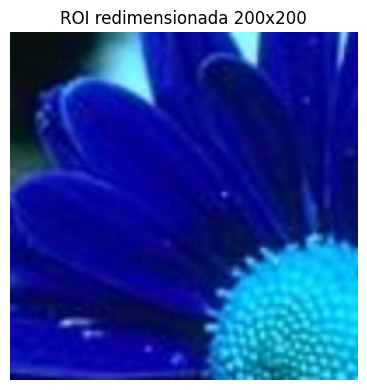

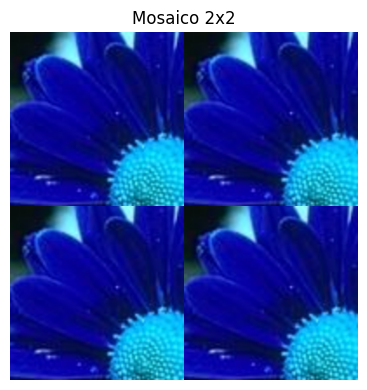

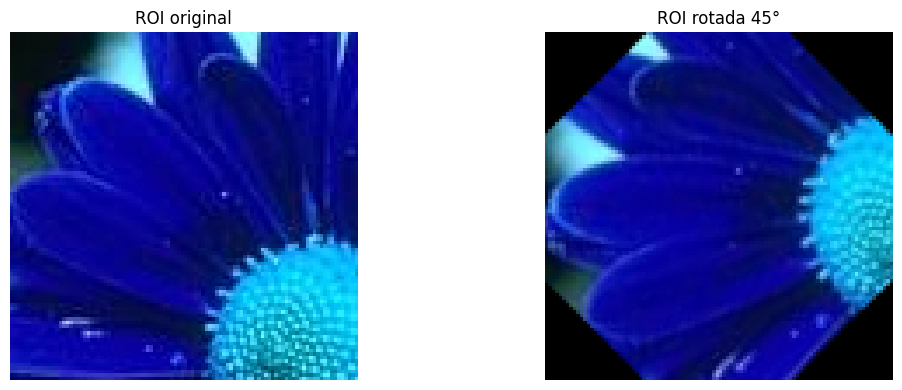

In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 2
# --------------------------------------

# --------------------------------------------------------
# 2.1: Definí y extraé una región de interés (ROI significa “Region of Interest” (Región de Interés)) de 100x100 píxeles

# Elegimos un punto de inicio (x, y). Por ejemplo, esquina superior izquierda
x, y = 50, 50
w, h = 100, 100  # ancho y alto del recorte
roi = img_paisaje[y:y+h, x:x+w]  # Recorte de la imagen original

# Mostramos la ROI
mostrar_imagenes([roi], ['ROI 100x100'])

# --------------------------------------------------------
# 2.2: Redimensioná la ROI a 200x200 píxeles
roi_grande = cv2.resize(roi, (200, 200))
mostrar_imagenes([roi_grande], ['ROI redimensionada 200x200'])

# --------------------------------------------------------
# 2.3: Creá un mosaico 2x2 con la ROI redimensionada
fila1 = np.hstack([roi_grande, roi_grande])  # primera fila
fila2 = np.hstack([roi_grande, roi_grande])  # segunda fila
mosaico = np.vstack([fila1, fila2])         # apilamos filas verticalmente

mostrar_imagenes([mosaico], ['Mosaico 2x2'])

# --------------------------------------------------------
# 2.4: BONUS - Rotación de 45 grados del recorte original
centro = (roi.shape[1] // 2, roi.shape[0] // 2)  # centro del recorte
# Calculamos el punto central de la ROI.
# roi.shape[1] es el ancho, roi.shape[0] es el alto.
# Dividimos entre 2 para obtener el centro, que será el eje de rotación.


angulo = 45
escala = 1.0
# Definimos que queremos rotar 45°.
# La escala de 1.0 significa que no cambiamos el tamaño al rotar.

# Matriz de transformación afín
M = cv2.getRotationMatrix2D(centro, angulo, escala)
#Esta matriz contiene la información matemática para rotar cada píxel alrededor del centro y aplicar la escala.

# Aplicamos la rotación
roi_rotado = cv2.warpAffine(roi, M, (roi.shape[1], roi.shape[0]))
# warpAffine aplica la transformación definida por la matriz M.
# El resultado es la ROI rotada 45° alrededor de su centro, con el mismo tamaño (ancho, alto) que la original.
# los píxeles fuera de los bordes quedan en negro por defecto.

mostrar_imagenes([roi, roi_rotado], ['ROI original', 'ROI rotada 45°'])
#comparación

In [ ]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 2:")
print("¿Cuál es la diferencia principal entre recortar (crop) y redimensionar (resize)?")
print("¿En qué casos prácticos usarías cada operación?")

**Recortar (crop):**

Cortás solo una parte de la imagen y descartás el resto.

*Se usa cuando te interesa un objeto específico o una región de interés, por ejemplo un rostro en una foto grupal.*


**Redimensionar (resize):**

Cambiás el tamaño de toda la imagen (más grande o más pequeña), pero conservás todo lo que está dentro.

*Se usa cuando querés adaptar la imagen a un tamaño estándar, crear mosaicos, o reducir peso para procesamiento rápido.*

### Ejercicio 3: Detección de Bordes (OpenCV vs. Scikit-image) (10 minutos)

En este ejercicio, vamos a comparar dos de los algoritmos más populares para la detección de bordes.

Tareas:

- Cargá la imagen `texto.png` y convertila a escala de grises.

- Aplicá el detector de bordes Canny con OpenCV. Experimentá con distintos umbrales.

- Aplicá el detector de bordes Sobel con scikit-image.

- Compará visualmente los resultados de ambos métodos.

Saving Alicia.Texto.png to Alicia.Texto.png
Imagen 'Alicia.Texto.png' cargada correctamente.


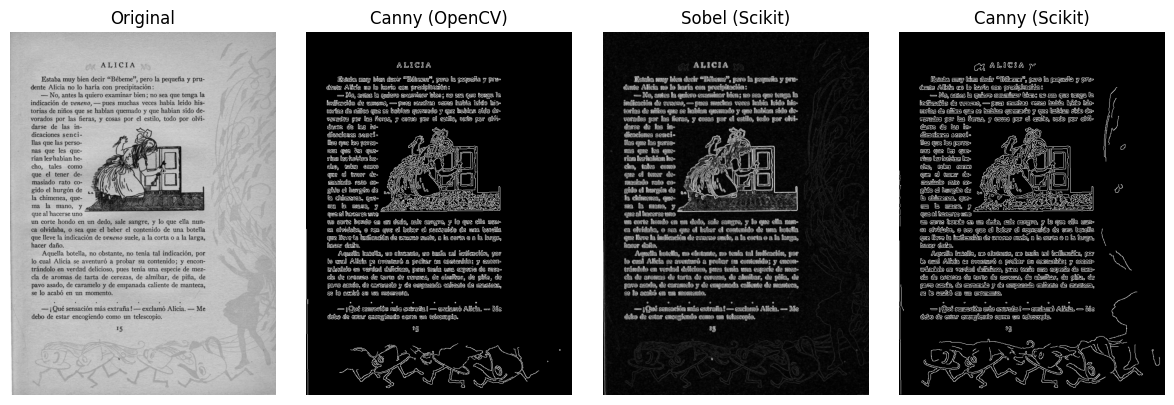

In [ ]:
# 1️⃣ Subir la imagen de texto desde tu PC
uploaded = files.upload()  # Seleccioná 'Alicia.Texto.png' desde tu computadora
nombre_archivo = list(uploaded.keys())[0]  # Tomamos el nombre del archivo subido

# 2️⃣ Cargar la imagen con OpenCV y convertir a escala de grises
img_texto = cv2.imread(nombre_archivo)
if img_texto is None:
    print("Error: la imagen no se pudo cargar.")
else:
    print(f"Imagen '{nombre_archivo}' cargada correctamente.")
    img_gray = cv2.cvtColor(img_texto, cv2.COLOR_BGR2GRAY)

    # 3️⃣ Aplicar detección de bordes

    # Canny con OpenCV
    bordes_canny = cv2.Canny(img_gray, 50, 150)

    # Sobel con scikit-image
    bordes_sobel = filters.sobel(img_gray)

    # Canny con scikit-image (imagen normalizada a [0,1])
    bordes_ski_canny = feature.canny(img_gray / 255.0)

    # 4️⃣ Visualización de resultados
    mostrar_imagenes([img_gray, bordes_canny, bordes_sobel, bordes_ski_canny],
                     ['Original', 'Canny (OpenCV)', 'Sobel (Scikit)', 'Canny (Scikit)'])

In [ ]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 3:")
print("¿Qué diferencias fundamentales observás entre los resultados de Canny y Sobel?")
print("¿Cuándo preferirías usar uno sobre el otro?")

**Canny**

- 	Tipo: Algoritmo multietapa (más complejo)
- 	Precisión: Alta, bordes finos y bien definidos
- 	Ruido: Filtra el ruido antes de detectar bordes
- 	Dirección: Detecta bordes en todas las direcciones
- 	Procesamiento: Más lento, pero más robusto
- 	Ideal para: Segmentación precisa, imágenes con mucho detalle o ruido

**Sobel**

-   Tipo: Filtro de derivada (más simple)
-  	Precisión: Menor, bordes más gruesos y con ruido
-  	Ruido: Más sensible al ruido
-  	Dirección: Detecta principalmente bordes horizontales y verticales
- 	Procesamiento: Más rápido y liviano
-  	Ideal para: Análisis rápido, visualización de gradientes, tareas preliminares

## Ejercicio 4: Segmentación de Monedas (10 minutos)

La segmentación consiste en dividir una imagen en regiones significativas. La umbralización (thresholding) es una de las técnicas más simples para lograrlo.

Tareas:

- Cargá `monedas.jpg` y convertila a escala de grises.

- Implementá tu propia función para segmentar por umbral.

- Probá la función con diferentes valores de umbral.

- Calculá el área segmentada (cantidad de píxeles blancos) para cada umbral.

Umbral 80: área segmentada = 62290 píxeles


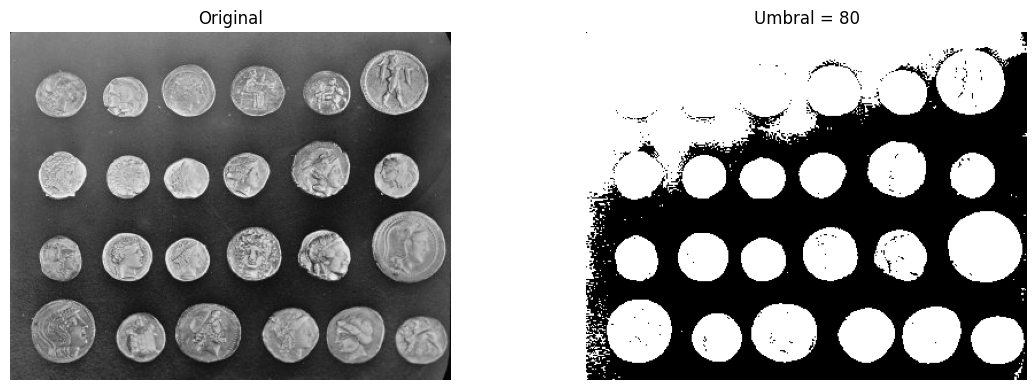

Umbral 120: área segmentada = 38336 píxeles


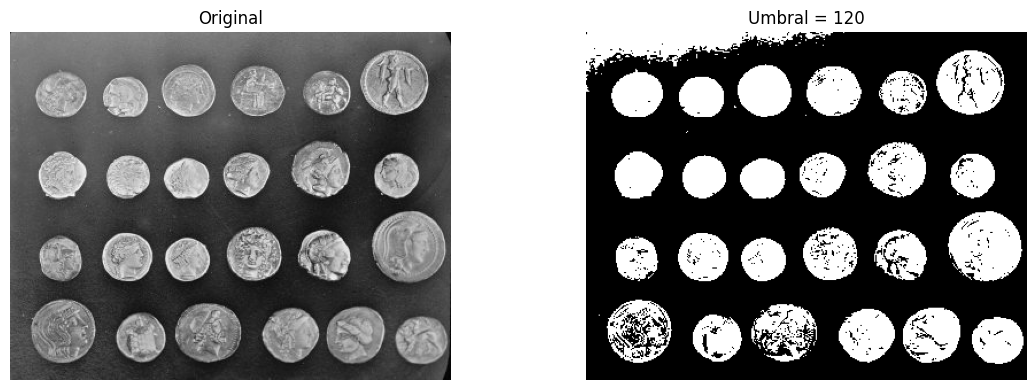

Umbral 160: área segmentada = 18993 píxeles


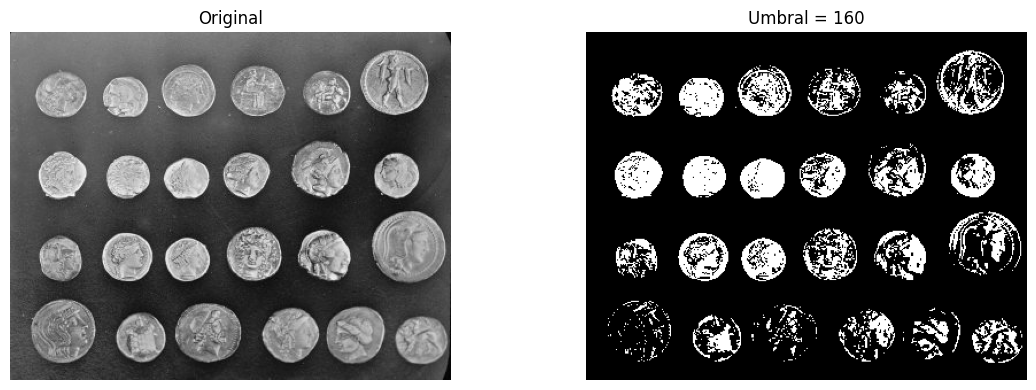

In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 4
# --------------------------------------

# 4.1: Cargar la imagen y pasar a escala de grises
img_monedas = cv2.imread('monedas.jpg')
monedas_gray = cv2.cvtColor(img_monedas, cv2.COLOR_BGR2GRAY)

# 4.2: Función iterativa de segmentación por umbral
def segmentar_umbral(imagen, umbral):
    """
    Segmenta una imagen usando un umbral fijo.
    - Los píxeles > umbral se convierten en 255 (blanco)
    - Los píxeles <= umbral se convierten en 0 (negro)
    Retorna la imagen segmentada y el área en píxeles blancos
    """
    N, M = imagen.shape
    segmentada = np.zeros((N, M), dtype=np.uint8)
    area = 0

    for i in range(N):
        for j in range(M):
            if imagen[i, j] > umbral:
                segmentada[i, j] = 255
                area += 1

    return segmentada, area

# 4.3: Probar con diferentes umbrales
umbrales = [80, 120, 160]
for t in umbrales:
    segmentada, area = segmentar_umbral(monedas_gray, t)
    print(f"Umbral {t}: área segmentada = {area} píxeles")
    mostrar_imagenes([monedas_gray, segmentada], [f'Original', f'Umbral = {t}'])

*segmentar = separar lo importante del resto de la imagen de forma automática.*
- Una imagen donde lo importante está blanco y lo que no te interesa está negro.

In [ ]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 4:")
print("¿Cómo afecta una iluminación no uniforme a la segmentación por umbral?")
print("¿Qué estrategia podrías usar para mitigar este problema?")

*Una iluminación no uniforme hace que algunas zonas se vean más claras u oscuras, lo que puede confundir al umbral fijo y provocar errores en la segmentación.*

*Solución fácil: usar umbral adaptativo, que ajusta el valor de umbral según la iluminación local de cada zona. Así se detectan mejor los objetos aunque la luz no sea pareja.*

### Ejercicio 5: Análisis con Histogramas (5 minutos)

El histograma de una imagen nos da información valiosa sobre la distribución de las intensidades de los píxeles.

Tareas:

- Calculá el histograma de la imagen de las monedas en escala de grises.

- Identificá cuál es el nivel de gris más frecuente en la imagen.

- Visualizá el histograma.

El nivel de gris más frecuente es: 36


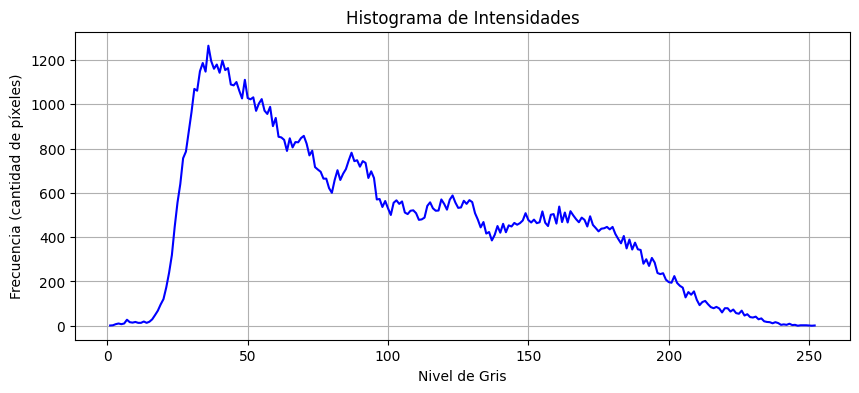

In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 5
# --------------------------------------

# 5.1: Calcular el histograma de la imagen en escala de grises
# 'hist' guarda la cantidad de píxeles de cada intensidad
# 'bins' guarda los niveles de gris correspondientes
hist, bins = exposure.histogram(monedas_gray)

# 5.2: Encontrar el nivel de gris más frecuente
# np.argmax(hist) devuelve la posición del valor máximo en el histograma
valor_mas_frecuente = bins[np.argmax(hist)]
print(f"El nivel de gris más frecuente es: {valor_mas_frecuente}")

# 5.3: Visualización del histograma
plt.figure(figsize=(10, 4))
plt.plot(bins, hist, color='blue')           # Graficamos el histograma
plt.title('Histograma de Intensidades')      # Título
plt.xlabel('Nivel de Gris')                  # Eje X: nivel de gris
plt.ylabel('Frecuencia (cantidad de píxeles)') # Eje Y: cantidad de píxeles
plt.grid(True)                               # Activamos la grilla para mejor lectura
plt.show()

In [ ]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 5:")
print("Observando el histograma, ¿qué información te puede ayudar a elegir")
print("un buen valor de umbral para la segmentación del ejercicio anterior?")

*Podés elegir un buen valor de umbral mirando dónde hay un salto fuerte en el histograma: por ejemplo, entre el pico principal (nivel de gris más común) y los valores más bajos o más altos. Ese cambio suele separar fondo y objetos. En el caso anterior, un umbral cerca de 40–80 podría funcionar bien para destacar las monedas.*

###Ejercicio Integrador: Pipeline Completo (10 minutos)

¡Llegó el momento de juntar todo! Vamos a crear una única función que realice un flujo de trabajo completo de procesamiento de imágenes.

Objetivo:

- Creá una función pipeline_procesamiento que reciba la ruta de una imagen y aplique una secuencia de pasos:

- Cargar la imagen.

- Realizar un preprocesamiento (convertir a escala de grises).

- Detectar los bordes.

- Segmentar la imagen original en escala de grises.

- Devolver y mostrar todos los resultados intermedios y finales.

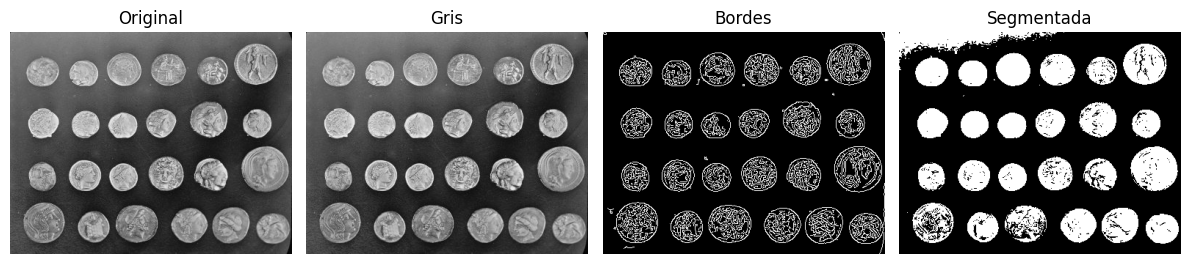

In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO INTEGRADOR
# --------------------------------------
# --------------------------------------
# EJERCICIO INTEGRADOR: Pipeline Completo
# --------------------------------------


# Función auxiliar para mostrar imágenes
def mostrar_imagenes(imagenes, titulos, cmap='gray', figsize=(12, 4)):
    n = len(imagenes)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    if n == 1:
        axes = [axes]
    for ax, img, titulo in zip(axes, imagenes, titulos):
        ax.imshow(img, cmap=cmap if len(img.shape) == 2 else None)
        ax.set_title(titulo)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Función pipeline
def pipeline_procesamiento(ruta_imagen, umbral_seg=120, canny_low=50, canny_high=150):
    """
    Pipeline que realiza un procesamiento de imagen de punta a punta.

    Parámetros:
    - ruta_imagen: Path al archivo de la imagen.
    - umbral_seg: Umbral para la segmentación.
    - canny_low, canny_high: Umbrales para Canny.

    Retorna un diccionario con resultados de cada paso.
    """
    resultados = {}

    # 1️⃣ Cargar la imagen en BGR
    img = cv2.imread(ruta_imagen)
    if img is None:
        print(f"Error: no se pudo cargar la imagen '{ruta_imagen}'")
        return None
    resultados['Original'] = img

    # 2️⃣ Convertir a escala de grises
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resultados['Gris'] = img_gray

    # 3️⃣ Detectar bordes con Canny
    bordes = cv2.Canny(img_gray, canny_low, canny_high)
    resultados['Bordes'] = bordes

    # 4️⃣ Segmentación por umbral (iterativa)
    N, M = img_gray.shape
    segmentada = np.zeros((N, M), dtype=np.uint8)
    for i in range(N):
        for j in range(M):
            if img_gray[i, j] > umbral_seg:
                segmentada[i, j] = 255
    resultados['Segmentada'] = segmentada

    return resultados

# -----------------------------
# Uso del pipeline
resultados = pipeline_procesamiento('monedas.jpg')
if resultados:
    mostrar_imagenes(list(resultados.values()), list(resultados.keys()))


###Reflexión y Síntesis (5 minutos)

¡Felicitaciones por completar el laboratorio! Tómate un momento para reflexionar sobre lo que aprendiste.

#### Preguntas de Síntesis:

- ¿Cuáles fueron las principales diferencias que notaste entre usar OpenCV y scikit-image? Por ejemplo, en la forma de llamar a las funciones o en los formatos de imagen que esperan.

- Pensá en una aplicación real o práctica para cada una de las siguientes técnicas:

`Detección de bordes:` ___________________

`Segmentación por umbral:` ___________________

`Manipulación de canales de color:` ___________________

- Si tuvieras que procesar automáticamente un lote de 1000 imágenes, ¿qué consideraciones adicionales tendrías en cuenta que no fueron cruciales en este laboratorio (por ejemplo, manejo de errores, variabilidad entre imágenes, eficiencia)?



---


---




***Diferencias OpenCV vs scikit-image:***

OpenCV espera imágenes en BGR y casi siempre en uint8 (0 a 255); funciones como cvtColor y Canny son muy directas.

scikit-image espera imágenes normalizadas entre 0 y 1 para muchas funciones, y usa formato RGB; algunas funciones devuelven float en lugar de uint8.



---

***Aplicaciones prácticas:***

**Detección de bordes**: reconocimiento de contornos en inspección industrial o detección de carreteras en imágenes satelitales.

**Segmentación por umbral**: contar monedas, células o defectos en una superficie.

**Manipulación de canales de color**: realce de vegetación en imágenes satelitales o corrección de color en fotografía.

---

**Procesar 1000 imágenes automáticamente:**

Control de errores (archivo faltante, lectura fallida).

Normalizar tamaños y formatos.

Manejar variabilidad de iluminación y contraste.

Optimizar eficiencia (procesamiento por lotes, vectorización)